In [4]:
import json
import os
import pathlib
#from datasets import DatasetDict, Dataset, Features, Value, Sequence, ClassLabel, Image
from pathlib import Path
from rich import print
import pandas as pd
import sys
import matplotlib.pyplot as plt

src_path = Path.cwd() / 'detection-datasets' / 'src'
sys.path.append(str(src_path))

from detection_datasets.detection_dataset import DetectionDataset  # Custom dataset preprocessing


In [5]:
DATA_DIR = Path.cwd().parent / "dataset" / "xview_coco_main"

In [6]:
images_dir = DATA_DIR / "images"

# Count the number of items in each folder
train_images_count = len(list(images_dir.iterdir()))
print(f"Number of images in train folder: {train_images_count}")

Number of images in train folder: 106514

In [7]:
# Function to load JSON and get length of "attributes" key
def load_data(json_path):
    with open(json_path, "r") as file:
        data = json.load(file)
    return data

# Count attributes in both files
annotations_file_train = DATA_DIR / "label.json"

In [8]:
data_config = {
    'dataset_format': 'coco',                        
    'path': DATA_DIR ,                            
    'splits': {                                   
        'train': (annotations_file_train, images_dir),
    },
}

# Load the dataset using the DetectionDataset class with the specified configuration
xview_data = DetectionDataset().from_disk(**data_config)

In [9]:
xview_data.n_images

9164

Showing image id 6163.


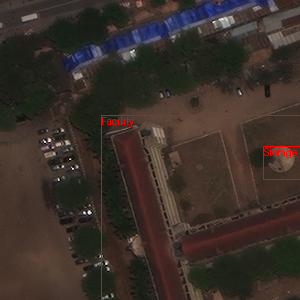

In [10]:
xview_data.show()

Showing image id 53.


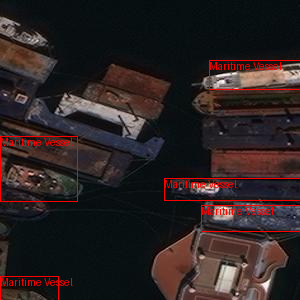

In [11]:
xview_data.show()


In [12]:
xview_data.n_images, xview_data.n_bbox

(9164, 18931)

In [13]:
xview_data.category_names

['Aircraft Hangar',
 'Facility',
 'Oil Tanker',
 'Damaged Building',
 'Cement Mixer',
 'Storage Tank',
 'Maritime Vessel',
 'Pylon',
 'Shipping Container',
 'Construction Site']

In [14]:
xview_data.data

,image_path,width,height,split,bbox_id,bbox,category_id,category,area
image_id,,,,,,,,,
1,/home/thankgod/2025/satlyt/sat_project/dataset...,300,300,train,[1],"[Bbox id 1 [208.0, 83.0, 237.0, 120.0]]",[1],[Facility],[1073]
2,/home/thankgod/2025/satlyt/sat_project/dataset...,300,300,train,"[2, 3, 4]","[Bbox id 2 [247.0, 197.0, 260.0, 239.0], Bbox ...","[8, 8, 8]","[Shipping Container, Shipping Container, Shipp...","[546, 585, 533]"
3,/home/thankgod/2025/satlyt/sat_project/dataset...,300,300,train,"[5, 6]","[Bbox id 5 [7.0, 197.0, 20.0, 239.0], Bbox id ...","[8, 8]","[Shipping Container, Shipping Container]","[546, 450]"
4,/home/thankgod/2025/satlyt/sat_project/dataset...,300,300,train,[7],"[Bbox id 7 [20.0, 145.0, 300.0, 300.0]]",[9],[Construction Site],[43400]
5,/home/thankgod/2025/satlyt/sat_project/dataset...,300,300,train,[8],"[Bbox id 8 [0.0, 145.0, 300.0, 300.0]]",[9],[Construction Site],[46500]
...,...,...,...,...,...,...,...,...,...
9160,/home/thankgod/2025/satlyt/sat_project/dataset...,300,300,train,[18927],"[Bbox id 18927 [145.0, 129.0, 205.0, 214.0]]",[1],[Facility],[5100]
9161,/home/thankgod/2025/satlyt/sat_project/dataset...,300,300,train,[18928],"[Bbox id 18928 [243.0, 140.0, 300.0, 178.0]]",[1],[Facility],[2166]
9162,/home/thankgod/2025/satlyt/sat_project/dataset...,300,300,train,[18929],"[Bbox id 18929 [3.0, 140.0, 118.0, 178.0]]",[1],[Facility],[4370]


In [15]:
xview_data.splits

['train']

In [16]:
xview_data.split(splits=[0.8, 0.1, 0.1])

/home/thankgod/2025/satlyt/sat_project/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [54]:
xview_data.splits

['train', 'validation', 'test']

In [17]:
xview_data.to_disk(name='xview_rfdetr',
                   absolute_path=Path.cwd().parent / 'dataset',
                   dataset_format='coco')

In [20]:

import json
from pathlib import Path

# Path to your annotations file
ann_path =  Path().resolve().parent / 'dataset' / 'xview_rfdetr' / "test/_annotations.coco.json"

# Load the JSON file
with ann_path.open("r", encoding="utf-8") as f:
    data = json.load(f)

# Ensure every category has a 'supercategory' key
for category in data.get("categories", []):
    category.setdefault("supercategory", "")

# Save the modified JSON
with ann_path.open("w", encoding="utf-8") as f:
    json.dump(data, f, indent=2)

print("✅ 'supercategory' fields added (if missing).")


✅ 'supercategory' fields added (if missing).

In [3]:
def remap_coco_category_ids_inplace(json_path):
    json_path = Path(json_path)
    with open(json_path, 'r') as f:
        data = json.load(f)

    original_ids = sorted(cat['id'] for cat in data['categories'])
    id_mapping = {old_id: new_id for new_id, old_id in enumerate(original_ids)}

    print("Original to new category ID mapping:")
    for old_id, new_id in id_mapping.items():
        print(f"{old_id} -> {new_id}")

    # Update category IDs in categories
    for cat in data['categories']:
        cat['id'] = id_mapping[cat['id']]

    # Update category IDs in annotations
    for ann in data['annotations']:
        ann['category_id'] = id_mapping[ann['category_id']]

    # Overwrite the original file
    with open(json_path, 'w') as f:
        json.dump(data, f, indent=2)

    print(f"Updated and saved remapped annotations to {json_path}")

if __name__ == "__main__":
    annotation_file = Path().resolve().parent / 'dataset' / 'xview_coco_main' / "label.json"
    remap_coco_category_ids_inplace(annotation_file)


Original to new category ID mapping:

1 -> 0

2 -> 1

3 -> 2

4 -> 3

5 -> 4

6 -> 5

7 -> 6

8 -> 7

9 -> 8

10 -> 9

Updated and saved remapped annotations to /home/thankgod/2025/satlyt/sat_project/dataset/xview_coco_main/label.json